<a href="https://colab.research.google.com/github/Anspire/Notebooks/blob/master/Thresholding_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thresholding

Thresholding transforms images into binary images. We need to set the threshold value and max values and then we convert the pixel values accordingly.

### Import cv2 and plt

In [0]:
# Imports
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Download images

In [2]:
# Download some images
!wget https://pngimage.net/wp-content/uploads/2018/06/gradation-png.png
!wget https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg

--2019-09-22 01:22:36--  https://pngimage.net/wp-content/uploads/2018/06/gradation-png.png
Resolving pngimage.net (pngimage.net)... 104.24.96.64, 104.24.97.64, 2606:4700:30::6818:6040, ...
Connecting to pngimage.net (pngimage.net)|104.24.96.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15232 (15K) [image/png]
Saving to: ‘gradation-png.png’

gradation-png.png   100%[===================>]  14.88K  --.-KB/s    in 0s      

2019-09-22 01:22:36 (82.4 MB/s) - ‘gradation-png.png’ saved [15232/15232]

--2019-09-22 01:22:39--  https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg
Resolving www.shrednations.com (www.shrednations.com)... 173.255.203.102
Connecting to www.shrednations.com (www.shrednations.com)|173.255.203.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254792 (249K) [image/jpeg]
Saving to: ‘corporate-espionage.jpg’

corporate-espionage 100%[===================>] 248.82K  1.55MB/s    in 0.2s    

2019-0

### Import image

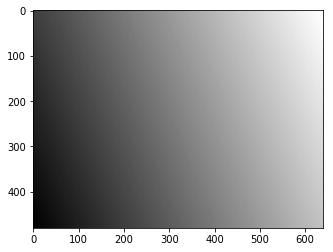

In [3]:
# Import the image
img = cv2.imread('gradation-png.png', 0) 

# Plot the image
plt.imshow(img, 'gray')
plt.show()

In [0]:
## Function to plot multiple images
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

## Simple Thresholding
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black).The function used is 
```
cv2.threshold(img, thresh_value, maxVal, style)
```
*   First argument is the source image(grayscale image).
*   Second argument is the threshold value which is used to classify the pixel values.
*   Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 
*   Third argument is the style of thresholding. OpenCV provides different styles of thresholding.

  1.  *cv2.THRESH_BINARY*
  2.  *cv2.THRESH_BINARY_INV*
  3.  *cv2.THRESH_TRUNC*
  4.  *cv2.THRESH_TOZERO*
  5.  *cv2.THRESH_TOZERO_INV*

![alt text](https://miro.medium.com/max/730/1*swjBYQOnuNfv1rHM3p39PQ.png) 

**I(x, y)** is the intensity at the point, or the pixel value at (x, y).


Two outputs are obtained **cv2.threshold** function. First one is a retval. Second output is our thresholded image.


### Binary

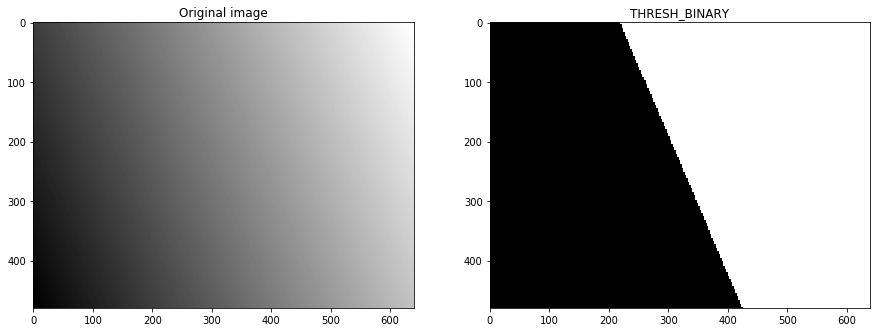

In [5]:
## Binary Thresholding
ret, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Plot the images
images = [img, img_binary]
titles = ['Original image', 'THRESH_BINARY']
plot_img(images, titles)

### Binary inverse

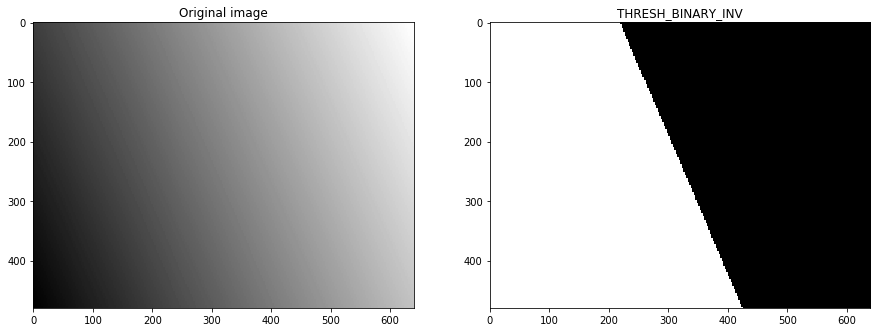

In [6]:
## Binary Inverse Thresholding
ret, img_binary_inv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Plot the images
images = [img, img_binary_inv]
titles = ['Original image', 'THRESH_BINARY_INV']
plot_img(images, titles)

### Threshold to zero

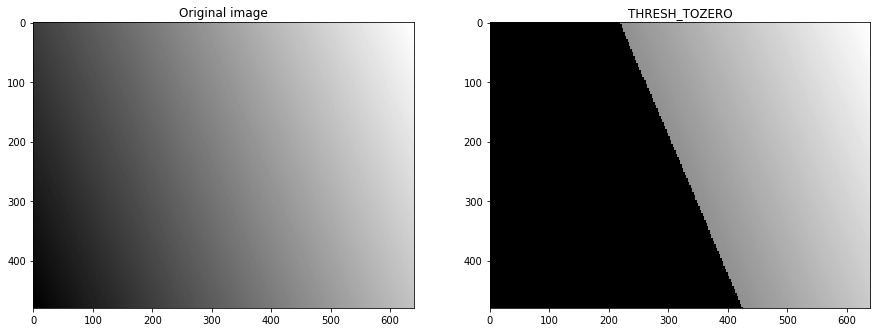

In [7]:
## Threshold to zero
ret, img_threshtozero = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

# Plot the images
images = [img, img_threshtozero]
titles = ['Original image', 'THRESH_TOZERO']
plot_img(images, titles)

### Threshold to zero inverse

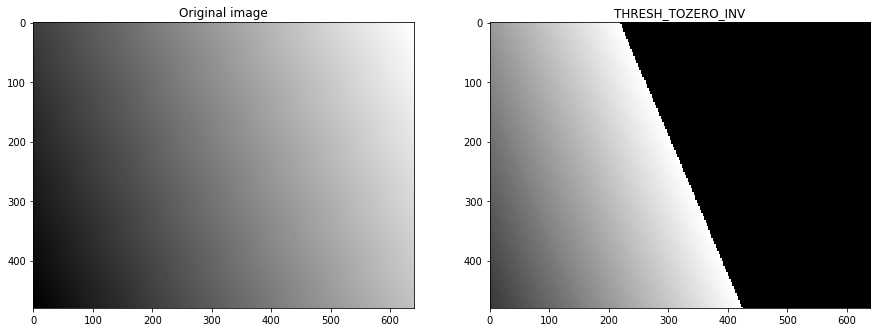

In [8]:
## Threshold to zero inverse
ret, img_threshtozero_inv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# Plot the images
images = [img, img_threshtozero_inv]
titles = ['Original image', 'THRESH_TOZERO_INV']
plot_img(images, titles)

### Threshold truncation

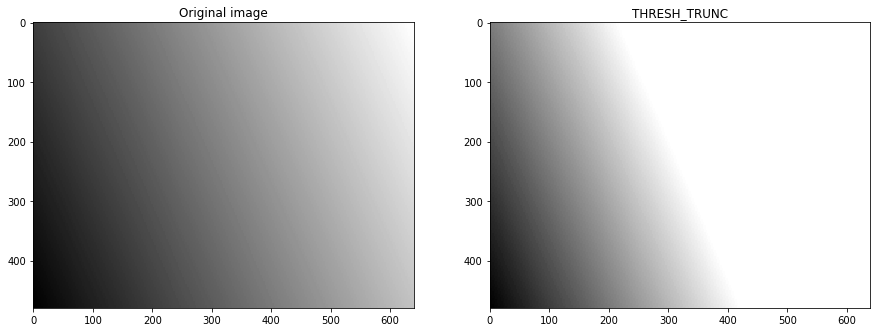

In [9]:
## Threshold truncation
ret, img_thresh_trunc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

# Plot the images
images = [img, img_thresh_trunc]
titles = ['Original image', 'THRESH_TRUNC']
plot_img(images, titles)

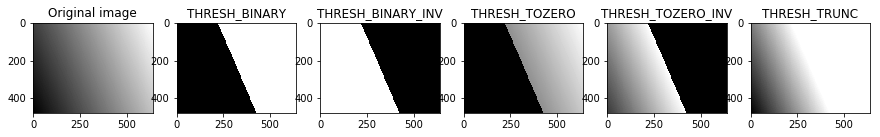

In [10]:
# Plot the images
images = [img, img_binary, img_binary_inv, img_threshtozero, img_threshtozero_inv, img_thresh_trunc]
titles = ['Original image', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TOZERO', 'THRESH_TOZERO_INV', 'THRESH_TRUNC']
plot_img(images, titles)


##Adaptive thresholding
In Simple thresholding, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.
```
cv2.adaptiveThreshold(img, maxValue, adaptiveMethod, thresholdType, blockSize, C)
```
It has three ‘special’ input params and only one output argument.

*   **Adaptive Method** :
  1. cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
  2. cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
*   **Block Size** - It decides the size of neighbourhood area.
*   **C** - It is just a constant which is subtracted from the mean or weighted mean calculated.




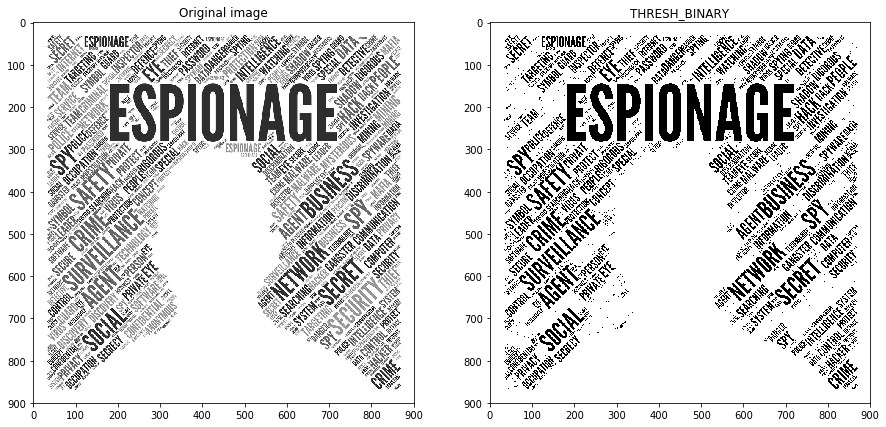

In [11]:
# Import the image in grayscale
img = cv2.imread('corporate-espionage.jpg', 0) 

# Binary Thresholding
ret, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Plot the images
images = [img, img_binary]
titles = ['Original image', 'THRESH_BINARY']
plot_img(images, titles)

### Adaptive Threshold Mean C

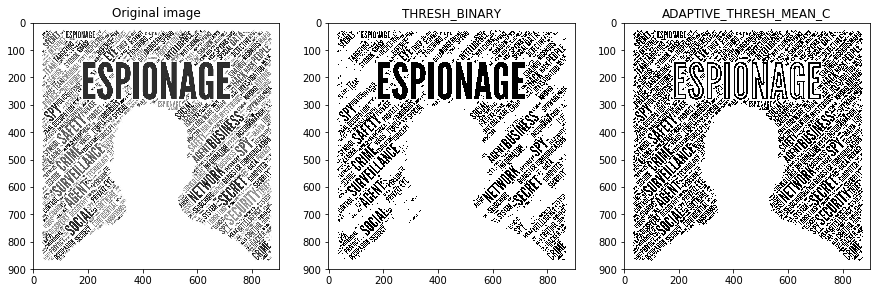

In [12]:
# Adaptive Threshold Mean C
img_thresh_mean_c = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Plot the images
images = [img, img_binary, img_thresh_mean_c]
titles = ['Original image', 'THRESH_BINARY', 'ADAPTIVE_THRESH_MEAN_C']
plot_img(images, titles)

### Adaptive Threshold Gaussion C

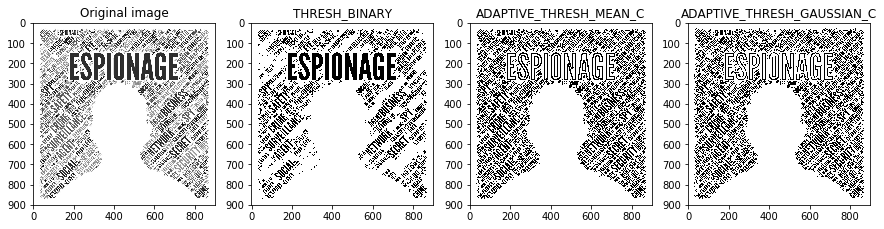

In [13]:
# Adaptive Threshold Gaussion C
img_thresh_gaussion_c = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plot the images
images = [img, img_binary, img_thresh_mean_c, img_thresh_gaussion_c]
titles = ['Original image', 'THRESH_BINARY', 'ADAPTIVE_THRESH_MEAN_C', 'ADAPTIVE_THRESH_GAUSSIAN_C']
plot_img(images, titles)